In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
___ = ''

In [4]:
pd.__version__

'1.5.3'

# Pandas DataFrames

## What is a DataFrame?

A DataFrame, simply put, is a **Table** of data.  It is a structure that contains multiple rows, each row containing the same labelled collection of data types.  For example, a DataFrame might look like this:

| (index) | Name | Age | Height | LikesIceCream |
| :---: | :--: | :--: | :--: | :--: |
| 0     | "Nick" | 22 | 3.4 | True |
| 1     | "Jenn" | 55 | 1.2 | True |
| 2     | "Joe"  | 25 | 2.2 | True |

Because each row contains the same data, DataFrames can also be thought of as a collection of same-length columns!

**Pandas** is a Python package that has a DataFrame class.  Using either the **DataFrame** class constructor or one of Pandas' many **read_()** functions, you can make your own DataFrame from a variety of sources.  

## Making DataFrames Directly

### From a List of Dicts

Dicts are named collections.  If you have many of the same dicts in a list, the DataFrame constructor can convert it to a Dataframe:

In [5]:
friends = [
    {'Name': "Nick", "Age": 31, "Height": 2.9},
    {'Name': "Jenn", "Age": 55, "Height": 1.2},
    {"Name": "Joe",  "Age": 25, "Height": 1.2},
]
pd.DataFrame(friends)

,Name,Age,Height
0,Nick,31,2.9
1,Jenn,55,1.2
2,Joe,25,1.2


### From a List of Lists

if you have a collection of same-length sequences, you essentially have a rectangular data structure already!  All that's needed is to add some column labels.

In [6]:
friends = [
    ['Nick', 31, 2.9],
    ['Jenn', 55, 1.2],
    ['Joe',  25, 1.2],
]
pd.DataFrame(friends, columns=["Name", "Age", "Height"])

,Name,Age,Height
0,Nick,31,2.9
1,Jenn,55,1.2
2,Joe,25,1.2


### From an empty DataFrame
If you prefer, you can also add columns one at a time, starting with an empty DataFrame:

In [7]:
df = pd.DataFrame()
df['Name'] = ['Nick', 'Jenn', 'Joe']
df['Age'] = [31, 55, 25]
df['Height'] = [2.9, 1.2, 1.2]
df

,Name,Age,Height
0,Nick,31,2.9
1,Jenn,55,1.2
2,Joe,25,1.2


### From a File
Finally, you make DataFrames from a wide variety of file types.  To do this, use one of the functions in Pandas that start with "read_".  Here is a non-exclusive list of examples:

| File Type | Function Name |
| :----:    |  :---:  |
| Excel | pd.read_excel() |
| CSV | pd.read_csv() |
| TSV | pd.read_table() |
| H5, HDF, HDF5 | pd.read_hdf() |
| JSON  | pd.read_json() |
| SQL | pd.read_sql_table() |


## (Lecture: CSV and Excel Files)

## Exercise
Make an Excel file containing the Name, Age, and Height columns from above, then load it into Pandas!

Make a CSV file containing the Name, Age, and Height columns (same table), then load it into Pandas

In [8]:
pd.read_csv('file.csv')

,name,age,height
0,Nick,31,2.9
1,Jenn,55,1.2
2,Joe,25,1.2


## Load the Data
For the rest of this section, we'll use the "World Fertility Rates" from the StatsModels repository.

In [9]:
df = pd.read_csv('worldbankdata.csv')
df

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,214,"Yemen, Rep.",YEM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.292,7.308,7.328,7.354,7.385,...,5.588,5.393,5.199,5.010,4.829,4.658,4.498,4.348,NaN,NaN
215,215,South Africa,ZAF,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.173,6.144,6.103,6.049,5.984,...,2.721,2.675,2.627,2.580,2.538,2.500,2.467,2.438,NaN,NaN
216,216,"Congo, Dem. Rep.",COD,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.001,6.015,6.030,6.048,6.067,...,6.809,6.728,6.642,6.550,6.454,6.354,6.251,6.146,NaN,NaN
217,217,Zambia,ZMB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.018,7.071,7.127,7.184,7.240,...,5.974,5.954,5.932,5.908,5.881,5.849,5.813,5.773,NaN,NaN


## Selecting Data

Pandas has a lot of flexibility in the number of syntaxes it supports.  For example, to select columns in a DataFrame:

```python
df['Column1']
df.Column1
df.get('Column1')
```

Multiple Columns can also be selected by providing a list:

```python
df[['Column1', 'Column2']]
df.get(['Column1', 'Column2'])
```

Rows are selected with the **iloc** and **loc** attributes:

```python
df.iloc[5]  # Used to get the "integer" index of the row.
df.loc['Row5']  # Used if rows are named.
```

If you want to label the rows, you can make an index by using the **set_index()** method or by assinging the **DataFrame.index** property:

```python
df = df.set_index('Column1')
df.index = df['Column1']
```

You can switch the rows and columns using the **transpose()** method or **T** property:

```python
df.transpose()
df.T
```

All of these approaches are described in the Pandas documentation here: https://pandas.pydata.org/pandas-docs/stable/user_duide/indexing.html


#### Exercises
Get the "Country Name" column from the data frame using the different methods:

In [10]:
df['CountryName']

0                 Aruba
1               Andorra
2           Afghanistan
3                Angola
4               Albania
             ...       
214         Yemen, Rep.
215        South Africa
216    Congo, Dem. Rep.
217              Zambia
218            Zimbabwe
Name: CountryName, Length: 219, dtype: object

In [11]:
df.CountryName

0                 Aruba
1               Andorra
2           Afghanistan
3                Angola
4               Albania
             ...       
214         Yemen, Rep.
215        South Africa
216    Congo, Dem. Rep.
217              Zambia
218            Zimbabwe
Name: CountryName, Length: 219, dtype: object

In [12]:
df.get('CountryName')

0                 Aruba
1               Andorra
2           Afghanistan
3                Angola
4               Albania
             ...       
214         Yemen, Rep.
215        South Africa
216    Congo, Dem. Rep.
217              Zambia
218            Zimbabwe
Name: CountryName, Length: 219, dtype: object

And the same with the year column **1976**:

In [13]:
df['1976']

0      2.472
1        NaN
2      7.670
3      7.186
4      4.244
       ...  
214    8.277
215    5.159
216    6.403
217    7.414
218    7.369
Name: 1976, Length: 219, dtype: float64

In [14]:
df.1976

SyntaxError: invalid syntax (3057170604.py, line 1)

In [ ]:
df.get('1976')

0      2.472
1        NaN
2      7.670
3      7.186
4      4.244
       ...  
214    8.277
215    5.159
216    6.403
217    7.414
218    7.369
Name: 1976, Length: 219, dtype: float64

What about getting both the years 1976 and 1977 at the same time?

In [ ]:
df[['1976','1977']]

,1976,1977
0,2.472,2.446
1,NaN,NaN
2,7.670,7.670
3,7.186,7.189
4,4.244,4.094
...,...,...
214,8.277,8.474
215,5.159,5.064
216,6.403,6.443
217,7.414,7.378


In [ ]:
df.___

In [ ]:
df.get(['1976','1977'])

,1976,1977
0,2.472,2.446
1,NaN,NaN
2,7.670,7.670
3,7.186,7.189
4,4.244,4.094
...,...,...
214,8.277,8.474
215,5.159,5.064
216,6.403,6.443
217,7.414,7.378


What about the 10th row of data?

In [ ]:
df.loc[[10]]

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
10,10,Australia,AUS,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.453,3.54,3.442,3.332,3.146,...,1.768,1.807,1.883,1.931,1.933,1.857,1.87,1.87,NaN,NaN


In [ ]:
df.iloc[[10]]

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
10,10,Australia,AUS,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.453,3.54,3.442,3.332,3.146,...,1.768,1.807,1.883,1.931,1.933,1.857,1.87,1.87,NaN,NaN


Whe 5th-8th row of data?

In [ ]:
df.loc[4:8]


,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
4,4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN
5,5,United Arab Emirates,ARE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.928,6.910,6.893,6.877,6.861,...,2.236,2.149,2.071,2.004,1.948,1.903,1.868,1.841,NaN,NaN
6,6,Argentina,ARG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.109,3.100,3.089,3.078,3.068,...,2.310,2.286,2.268,2.254,2.241,2.228,2.215,2.201,NaN,NaN
7,7,Armenia,ARM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.550,4.512,4.435,4.317,4.161,...,1.715,1.724,1.728,1.731,1.734,1.736,1.738,1.738,NaN,NaN
8,8,American Samoa,ASM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.iloc[4:8]

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
4,4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN
5,5,United Arab Emirates,ARE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.928,6.910,6.893,6.877,6.861,...,2.236,2.149,2.071,2.004,1.948,1.903,1.868,1.841,NaN,NaN
6,6,Argentina,ARG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.109,3.100,3.089,3.078,3.068,...,2.310,2.286,2.268,2.254,2.241,2.228,2.215,2.201,NaN,NaN
7,7,Armenia,ARM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.550,4.512,4.435,4.317,4.161,...,1.715,1.724,1.728,1.731,1.734,1.736,1.738,1.738,NaN,NaN


In [ ]:
df.

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN
5,United Arab Emirates,ARE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.928,6.910,6.893,6.877,6.861,6.841,...,2.236,2.149,2.071,2.004,1.948,1.903,1.868,1.841,NaN,NaN
6,Argentina,ARG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.109,3.100,3.089,3.078,3.068,3.058,...,2.310,2.286,2.268,2.254,2.241,2.228,2.215,2.201,NaN,NaN
7,Armenia,ARM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.550,4.512,4.435,4.317,4.161,3.979,...,1.715,1.724,1.728,1.731,1.734,1.736,1.738,1.738,NaN,NaN
8,American Samoa,ASM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,ATG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.425,4.386,4.344,4.299,4.250,4.193,...,2.246,2.224,2.203,2.183,2.164,2.146,2.130,2.115,NaN,NaN


What about just Germany' data?

In [ ]:
df2 = df.set_index("CountryName")
df2.index = df["CountryName"]

In [ ]:
df2.head()

,Unnamed: 0,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,0,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
Andorra,1,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
Afghanistan,2,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
Angola,3,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
Albania,4,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


In [ ]:
df2.loc[['Germany']]
df2.iloc[[50]]


,Unnamed: 0,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
CountryName,,,,,,,,,,,,,,,,,,,,,
Germany,50,DEU,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2.37,2.45,2.44,2.51,2.54,2.5,...,1.36,1.34,1.33,1.37,1.38,1.36,1.39,1.36,NaN,NaN


**Note:** When selecting single columns, Pandas will give a Series object instead of a DataFrame. If you'd like to keep it as a DataFrame, you can put the column name in a list:

```python
df[['Column1']]
df.get(['Column1'])
```

**Discussion**: What data selection syntax do you prefer?  What are some pros and cons of each?

## Summarizing / Aggregating Data in DataFrames

Pandas' Series and DataFrames are iterables, and can be given to any function that expects a list or Numpy Array, which allows them to be useful to many different libraries' functions.  For example, to compute a mean of a column:

```python
np.mean(df['Column1'])
```

You can also use the "agg" method to call a function on the rows or columns of a DataFrame:

```python
df['Column1'].agg(np.mean)
```

Finally, Pandas supplies many different aggregation functions as methods:

```python
df.mean()
```

#### Exercises

What is the standard deviation of the Fertility rates in 1970?

In [ ]:
df['1970'].agg(np.mean)


5.134113402061857

What is the difference between the maximum and minimum Fertility rate in the same year? (np.ptp)

In [ ]:
np.ptp(df['1970'])

nan

Indexing rows without the use of loc or iloc function

In [ ]:
df[1:2]

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
1,1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.24,1.18,1.25,1.19,1.22,NaN,NaN,NaN


In [ ]:
#df
df.iloc[0:,4:]

,IndicatorCode,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,SP.DYN.TFRT.IN,7.292,7.308,7.328,7.354,7.385,7.418,7.447,7.471,7.491,...,5.588,5.393,5.199,5.010,4.829,4.658,4.498,4.348,NaN,NaN
215,SP.DYN.TFRT.IN,6.173,6.144,6.103,6.049,5.984,5.911,5.836,5.765,5.700,...,2.721,2.675,2.627,2.580,2.538,2.500,2.467,2.438,NaN,NaN
216,SP.DYN.TFRT.IN,6.001,6.015,6.030,6.048,6.067,6.089,6.111,6.135,6.161,...,6.809,6.728,6.642,6.550,6.454,6.354,6.251,6.146,NaN,NaN
217,SP.DYN.TFRT.IN,7.018,7.071,7.127,7.184,7.240,7.292,7.338,7.376,7.405,...,5.974,5.954,5.932,5.908,5.881,5.849,5.813,5.773,NaN,NaN


In [ ]:
np.mean(df2)

/home/andrea/Scrivania/Labo_comp/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/andrea/Scrivania/Labo_comp/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Unnamed: 0    109.000000
1960            5.511814
1961            5.492338
1962            5.491603
1963            5.487974
1964            5.441701
1965            5.392103
1966            5.337876
1967            5.293995
1968            5.239613
1969            5.186691
1970            5.134113
1971            5.074385
1972            5.022168
1973            4.961747
1974            4.904335
1975            4.838500
1976            4.791330
1977            4.713490
1978            4.656840
1979            4.609588
1980            4.558912
1981            4.494923
1982            4.435794
1983            4.393291
1984            4.340168
1985            4.278709
1986            4.219163
1987            4.148575
1988            4.098582
1989            4.024051
1990            3.956116
1991            3.875231
1992            3.791060
1993            3.729359
1994            3.645030
1995            3.561085
1996            3.516530
1997            3.421980
1998            3.378935


What the sum of squared diffferences of the data from its mean in the same year?

In [ ]:
def sum_squares(array):
    diff = array - np.mean(array)
    sum = np.sum(diff*diff)
    return sum

sum_squares(df['1970'])

#df.iloc[1:,4:].agg(np.mean)
#df[row position, column position]

699.2408895051547

What about the mean of Germany's fertility rates, across all years?

In [ ]:
np.mean(df2.loc[['Germany']])
#np.mean(array)

/home/andrea/Scrivania/Labo_comp/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/andrea/Scrivania/Labo_comp/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Unnamed: 0    50.00
1960           2.37
1961           2.45
1962           2.44
1963           2.51
1964           2.54
1965           2.50
1966           2.53
1967           2.48
1968           2.38
1969           2.21
1970           2.03
1971           1.92
1972           1.71
1973           1.54
1974           1.51
1975           1.45
1976           1.45
1977           1.40
1978           1.38
1979           1.38
1980           1.44
1981           1.43
1982           1.41
1983           1.33
1984           1.29
1985           1.37
1986           1.43
1987           1.43
1988           1.46
1989           1.42
1990           1.45
1991           1.33
1992           1.29
1993           1.28
1994           1.24
1995           1.25
1996           1.30
1997           1.35
1998           1.36
1999           1.36
2000           1.38
2001           1.35
2002           1.34
2003           1.34
2004           1.36
2005           1.34
2006           1.33
2007           1.37
2008           1.38


**Discussion**: What are some challenges you see with aggregations of country data in this dataset?

## Transforming Data: Broadcasting Element-Wise Operations

Any transformation function can be performed on each element of a column, or even all columns of a DataFrame.  Here are several options for this approach:

Numpy-like Operator syntax:
```python
df['Column1'] * 100
```

Functions-style syntax:
```python
np.sqrt(df['Column1'])
```

Special broadcasted-version of different classes' Methods:
```python
df['Column1'].str.upper()
```

Apply() methods:
```python
df['Column1'].apply(np.sqrt)
```

****Exercises****: Let's try some of these on the data:

Square-root the values in 1970:

In [ ]:
np.sqrt(df['1970'])

0      1.705286
1           NaN
2      2.769657
3      2.702036
4      2.247221
         ...   
214    2.746270
215    2.364530
216    2.492790
217    2.727086
218    2.723417
Name: 1970, Length: 219, dtype: float64

In [ ]:
df['1970'].apply(np.sqrt)

0      1.705286
1           NaN
2      2.769657
3      2.702036
4      2.247221
         ...   
214    2.746270
215    2.364530
216    2.492790
217    2.727086
218    2.723417
Name: 1970, Length: 219, dtype: float64

Lowercase all of the country names using the string lower() method:

In [ ]:
df['CountryName'].apply(lambda x: x.lower())


0                 aruba
1               andorra
2           afghanistan
3                angola
4               albania
             ...       
214         yemen, rep.
215        south africa
216    congo, dem. rep.
217              zambia
218            zimbabwe
Name: CountryName, Length: 219, dtype: object

In [ ]:
df['CountryName'].apply(___)

Replace all of the spaces with hyphens in Country Names (using the string replace() method):

In [ ]:
df['CountryName'].apply(lambda x: x.replace(' ','-'))


0                 Aruba
1               Andorra
2           Afghanistan
3                Angola
4               Albania
             ...       
214         Yemen,-Rep.
215        South-Africa
216    Congo,-Dem.-Rep.
217              Zambia
218            Zimbabwe
Name: CountryName, Length: 219, dtype: object

In [ ]:
df['CountryName'].apply(___)

## Handling Missing Values

Missing values can be indicated with a None or np.nan value, like in Numpy.  Pandas Dataframes have several methods for detecting, removing, and replacing these values:

```python
df.isna()
df.notna()
df.dropna()
df.fillna()
df.interpolate()
```

In [ ]:
data = df.iloc[1][-10:]
data[4] = np.nan
data = data.astype(float)

In [ ]:
data

2004     NaN
2005     NaN
2006    1.24
2007    1.18
2008     NaN
2009    1.19
2010    1.22
2011     NaN
2012     NaN
2013     NaN
Name: 1, dtype: float64

**Discussion**: What approaches to data imputation appear most often in your work?

## Filtering Data

To get rows based on their value, Pandas supports both Numpy's logical indexing for filtering rows and an SQL-like query string.  For example, to get all the rows of a dataframe that is positive for Column1:

```python
positive_rows = df['Column1'] > 0
df[positive_rows]
```

Often, this is done in a single line:

```python
df[df['Column1'] > 0]
```

And using the query() method:

```python
df.query('Column1 > 0')
```


#### Exercises
Try the three different filtering methods for each getting Germany's Data:

In [ ]:
germany_row = df['CountryName'] == 'Germany'
df[germany_row]

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
50,50,Germany,DEU,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2.37,2.45,2.44,2.51,2.54,...,1.36,1.34,1.33,1.37,1.38,1.36,1.39,1.36,NaN,NaN


In [ ]:
df[df['CountryName']=='Germany']

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
50,50,Germany,DEU,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2.37,2.45,2.44,2.51,2.54,...,1.36,1.34,1.33,1.37,1.38,1.36,1.39,1.36,NaN,NaN


In [ ]:
df.query("CountryName=='Germany'")

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
50,50,Germany,DEU,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2.37,2.45,2.44,2.51,2.54,...,1.36,1.34,1.33,1.37,1.38,1.36,1.39,1.36,NaN,NaN


Also, for the fertility rates above 10 in 2005:

In [ ]:
df[df['2005']>=7]

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
142,142,Niger,NER,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.052,7.083,7.116,7.150,7.185,...,7.636,7.617,7.602,7.593,7.588,7.585,7.584,7.581,NaN,NaN
177,177,Somalia,SOM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.250,7.252,7.255,7.258,7.261,...,7.361,7.292,7.219,7.140,7.056,6.965,6.869,6.769,NaN,NaN
190,190,Chad,TCD,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.250,6.268,6.285,6.301,6.318,...,7.147,7.074,6.992,6.902,6.805,6.702,6.596,6.486,NaN,NaN


In [ ]:
#df.query("2005 >= 7")
df.query("['2005'] >= 7")



TypeError: '>=' not supported between instances of 'list' and 'int'

**Discussion**: How might you approach this if you wanted just the fertility rates above 10, regardless of year or country, but still wanted to know which country and year the values appeared in?

## Plots

Pandas DataFrames have a plot module as an attribute!

```python
>>> df['1973'].plot.hist()
```

**Exercises** Make at least 3 different visualizations, showing different aspects of the data:

Plot 1:

<Axes: ylabel='Frequency'>

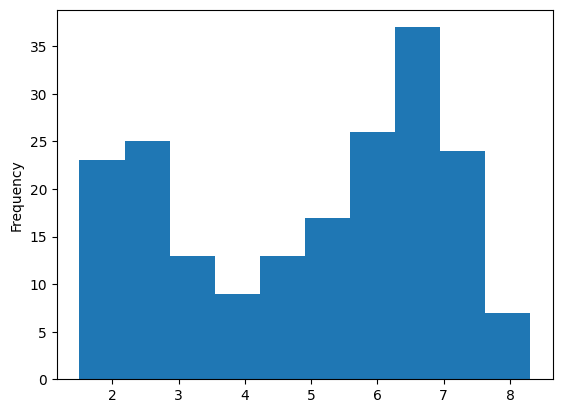

In [ ]:
df['1973'].plot.hist()

Plot 2:

In [ ]:
dir(df['1970'].plot)

['__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_all_kinds',
 '_common_kinds',
 '_constructor',
 '_dataframe_kinds',
 '_dir_additions',
 '_dir_deletions',
 '_get_call_args',
 '_hidden_attrs',
 '_kind_aliases',
 '_parent',
 '_reset_cache',
 '_series_kinds',
 'area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

Plot 3

<Axes: >

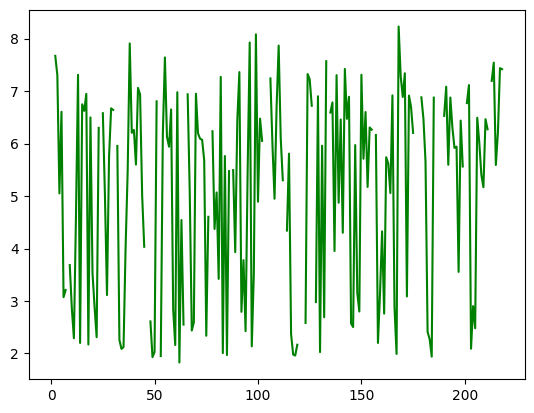

In [15]:
df['1970'].plot.line(x='asse x',y='asse y',color='Green')

Plot 4

In [16]:
df

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,214,"Yemen, Rep.",YEM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.292,7.308,7.328,7.354,7.385,...,5.588,5.393,5.199,5.010,4.829,4.658,4.498,4.348,NaN,NaN
215,215,South Africa,ZAF,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.173,6.144,6.103,6.049,5.984,...,2.721,2.675,2.627,2.580,2.538,2.500,2.467,2.438,NaN,NaN
216,216,"Congo, Dem. Rep.",COD,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.001,6.015,6.030,6.048,6.067,...,6.809,6.728,6.642,6.550,6.454,6.354,6.251,6.146,NaN,NaN
217,217,Zambia,ZMB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.018,7.071,7.127,7.184,7.240,...,5.974,5.954,5.932,5.908,5.881,5.849,5.813,5.773,NaN,NaN


Plot 5:

In [25]:
dftemp=np.mean(df[1:,1:])
dftemp
#dftemp.plot.line(x=dftemp[0],y=dftemp[1])
#dftemp.plot.hist()

InvalidIndexError: (slice(1, None, None), slice(1, None, None))

## Plotting with Matplotlib

Pandas is using a Python package called MatPlotLib to do the plotting for it.  Let's recreating the same plots using Matplotlb functions, instead of the Pandas DataFrame methods.  

So, instead of this:

```python
>>> df['1972'].plot.hist()
```

We can do this:
```python
>>> import matplotlib.pyplot as plt
>>> plt.hist(df['1972'])
>>> plt.title('1972')
>>> plt.xlabel('Fertility Rate')
>>> plt.ylabel('Frequency')
```




In [26]:
import matplotlib.pyplot as plt

Plot 1:

Plot 2

Plot 3

Plot 4

Plot 5

## Rolling Windows

Rolling windows are used most often for smoothing data, particularly data that changes over time.  Pandas has a special "rolling()" method that can calculate aggregations over overlapping windows using a variety of methods:

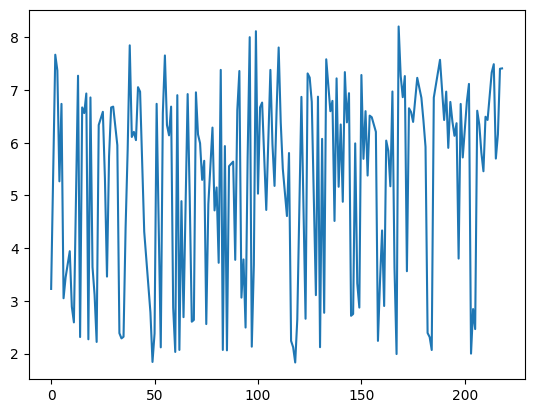

In [27]:
df['1968'].dropna().plot();

<Axes: >

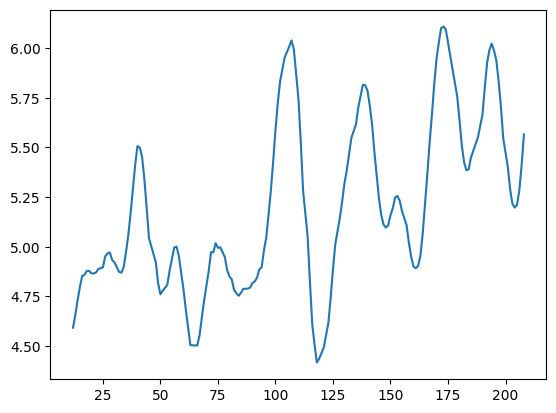

In [32]:
#df['1968'].dropna().rolling(20, center=True, win_type='hanning').mean().plot()
df['1968'].dropna().rolling(20, center=True, win_type='hamming').mean().plot()


**Note**: The above example shows how methods can be "dot-chained" together to form mini-pipelines.  These can get quite long, so to make them a bit easier to read, sometimes you'll see them spread out on multiple lines using parentheses to glue them together:

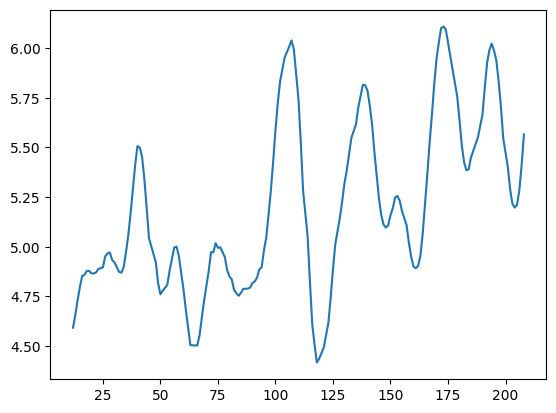

In [33]:
(df
 .get('1968')
 .dropna()
 .rolling(20, center=True, win_type='hamming')
 .mean()
 .plot()
);

# Break

## Long (aka "Tidy") DataFrames

This dataset is concise, but challenging to analyze, because it contains a mixed structure that mixes data labels and values in a variety of ways. Let's look at it again:

In [34]:
df.head(10)

,Unnamed: 0,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN
5,5,United Arab Emirates,ARE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.928,6.910,6.893,6.877,6.861,...,2.236,2.149,2.071,2.004,1.948,1.903,1.868,1.841,NaN,NaN
6,6,Argentina,ARG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.109,3.100,3.089,3.078,3.068,...,2.310,2.286,2.268,2.254,2.241,2.228,2.215,2.201,NaN,NaN
7,7,Armenia,ARM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.550,4.512,4.435,4.317,4.161,...,1.715,1.724,1.728,1.731,1.734,1.736,1.738,1.738,NaN,NaN
8,8,American Samoa,ASM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Antigua and Barbuda,ATG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.425,4.386,4.344,4.299,4.250,...,2.246,2.224,2.203,2.183,2.164,2.146,2.130,2.115,NaN,NaN


This mixed structure means that, depending on the columns used, we need to write different code to answer our questions.  We can simplify our code by reorganizing the data into a simpler table-like structure using the pandas **melt()** method:

In [36]:
dfl = df.melt(
    id_vars=['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'], 
    var_name='Year', value_vars=df.columns[df.columns.str.isdigit()], 
    value_name='Fertility'
)
dfl.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Fertility
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,4.820
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,7.671
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,7.316
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.186


Long tables are particularly nice, because they contain a lot more information about the dataset!

We can undo the operation, making a new "wide" table with the **pivot()** method:

In [38]:
dfl.pivot(index='Year', columns='CountryName', values='Fertility').head()

CountryName,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,7.671,6.186,7.648,NaN,NaN,7.316,4.425,3.109,4.550,4.820,...,2.881,6.707,7.197,6.616,6.348,5.615,NaN,7.292,7.018,7.158
1961,7.671,6.076,7.649,NaN,NaN,7.354,4.386,3.100,4.512,4.655,...,2.887,6.755,7.120,6.637,6.392,5.651,NaN,7.308,7.071,7.215
1962,7.671,5.956,7.650,NaN,NaN,7.385,4.344,3.089,4.435,4.471,...,2.885,6.783,7.033,6.628,6.425,5.679,NaN,7.328,7.127,7.267
1963,7.671,5.833,7.652,NaN,NaN,7.410,4.299,3.078,4.317,4.271,...,2.874,6.790,6.938,6.581,6.448,5.696,NaN,7.354,7.184,7.311
1964,7.671,5.711,7.653,NaN,NaN,7.425,4.250,3.068,4.161,4.059,...,2.858,6.777,6.836,6.495,6.464,5.698,NaN,7.385,7.240,7.347


In addition, you can explore different rotations of your data using the stack() and unstack() methods:

In [39]:
dfl.unstack()

CountryName  0              Aruba
             1            Andorra
             2        Afghanistan
             3             Angola
             4            Albania
                         ...     
Fertility    11821            NaN
             11822            NaN
             11823            NaN
             11824            NaN
             11825            NaN
Length: 70956, dtype: object

In [40]:
dfl.stack()

0      CountryName                                         Aruba
       CountryCode                                           ABW
       IndicatorName    Fertility rate, total (births per woman)
       IndicatorCode                              SP.DYN.TFRT.IN
       Year                                                 1960
                                          ...                   
11825  CountryName                                      Zimbabwe
       CountryCode                                           ZWE
       IndicatorName    Fertility rate, total (births per woman)
       IndicatorCode                              SP.DYN.TFRT.IN
       Year                                                 2013
Length: 69414, dtype: object

## Aggregating Data by Groups:

Once your data is in a simple structure, there are many different ways that you can summarize your data, particularly when there are categorical factors in your dataset.  For example, you can pivot your data and aggregate along multiple axes:

In [41]:
dfl.pivot_table(values='Fertility', index='Year', aggfunc='mean').head()

,Fertility
Year,
1960,5.511814
1961,5.492338
1962,5.491603
1963,5.487974
1964,5.441701


In [42]:
dfl.pivot_table(values='Fertility', index='Year', columns='CountryName', aggfunc='mean').head()

CountryName,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,7.671,6.186,7.648,NaN,7.316,4.425,3.109,4.550,4.820,3.453,...,2.881,6.707,7.197,6.616,6.348,5.615,NaN,7.292,7.018,7.158
1961,7.671,6.076,7.649,NaN,7.354,4.386,3.100,4.512,4.655,3.540,...,2.887,6.755,7.120,6.637,6.392,5.651,NaN,7.308,7.071,7.215
1962,7.671,5.956,7.650,NaN,7.385,4.344,3.089,4.435,4.471,3.442,...,2.885,6.783,7.033,6.628,6.425,5.679,NaN,7.328,7.127,7.267
1963,7.671,5.833,7.652,NaN,7.410,4.299,3.078,4.317,4.271,3.332,...,2.874,6.790,6.938,6.581,6.448,5.696,NaN,7.354,7.184,7.311
1964,7.671,5.711,7.653,NaN,7.425,4.250,3.068,4.161,4.059,3.146,...,2.858,6.777,6.836,6.495,6.464,5.698,NaN,7.385,7.240,7.347


You can create counts of your different combinations by building a contingincy table:

In [44]:
pd.crosstab(dfl['CountryName'], dfl['Year'])

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Albania,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
American Samoa,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Andorra,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
West Bank and Gaza,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Yemen, Rep.",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


The most common approach, however, is the **groupby()** method, which works similarly to the rolling() method, in that you calculate an aggregate on a special object:

In [45]:
dfl.groupby('Year').mean().head()

/tmp/ipykernel_4891/1799262495.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfl.groupby('Year').mean().head()


,Fertility
Year,
1960,5.511814
1961,5.492338
1962,5.491603
1963,5.487974
1964,5.441701


In [47]:
dfl.groupby(['CountryName', 'Year']).mean().head()

/tmp/ipykernel_4891/130101810.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfl.groupby(['CountryName', 'Year']).mean().head()


Fertility
CountryName Year           
Afghanistan 1960      7.671
            1961      7.671
            1962      7.671
            1963      7.671
            1964      7.671

You can also use groupby in a for-loop, in case it's desired:

In [48]:
for country_name, dd in df.groupby('CountryName'):
    pass

**Note**: Because these approaches create new indices, you'll often see a **reset_index()** call afterwards to restore a simple columnar-only "table"-like structure.

## Joining DataFrames

Finally, if we have multiple datasets, we can join them together by matching up their rows via a "join" function or "merge" method call.  To explore this, let's get some more data: the Continent Name of each Country.

In [50]:
url = 'http://techslides.com/list-of-countries-and-capitals'
dfc = pd.read_html(url, header=0)[0]
dfc

ImportError: lxml not found, please install it

We'll use the the **merge()** function to match the two datasets on the "Country Name" columns:

In [ ]:
dfl2 = pd.merge(dfl, dfc, on='Country Name')
dfl2.head()

Now, we can group by continents!

In [ ]:
dfl2.groupby("Continent Name")['Fertility'].mean()

## Exercises 
Let's practice answering some more-complex questions with our new structure!

How could we *only* add the continent name to the dataset, without all the longitude/latitute info and duplicated codes?

How can we track the the variance of the continent's fertility rate between its countries, over time?

How many countries are in each continent?

How well is each continent's data tracked? (e.g. what percent of missing data is in each continent?)

What was the average fertility rate of the three "Americas" during the 1990s?

## Visualization

Long dataframes make for simpler visualization, particularly with the seaborn and plotly-express packages:

In [49]:
import seaborn as sns
dfl2.Year = dfl2.Year.astype(int)
sns.lineplot(data=dfl2, x='Year', y='Fertility', hue='Continent Name', );

ModuleNotFoundError: No module named 'seaborn'

## Writing Data

Pandas supports a wealth of data formats, all with a **DataFrame.to_()** method.  Let's take a look at some of these and discuss some gotchas we've come across when using them.

In [ ]:
dfl2.to_csv("continent_fertility.csv")